In [1]:
import re as re

import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%ls data

Air pollutant.csv
Dog and Cat food production EIO_LCA.xlsx
Energy.csv
GWP.csv
sector.csv


In [3]:
airpolu=pd.read_csv("data/Air pollutant.csv")
energy=pd.read_csv("data/Energy.csv")
GWP=pd.read_csv("data/GWP.csv")
sector=pd.read_csv("data/sector.csv")

In [4]:
def combineSector(df, df_sector):
    def find_number(text):
        num = re.findall(r'[0-9]+',text)
        return " ".join(num)

    def first2(text):
        return text[:2]
    df2 = df.copy()
    ID2 = df2['ID'].map(find_number).map(first2).astype('int64')
    df2.insert(loc=1, column='ID2', value=ID2)
    df_sector=df_sector.merge(df2, on='ID2', how='right')
    return df_sector

def tsneFind2Pinciple(df_sector):

    Principle = TSNE(n_components=2).fit_transform(df_sector.iloc[:,4:])
    Principle=pd.DataFrame(Principle, columns=['P1','P2'])
    new_df=df_sector.iloc[:,:4]
    new_df[['P1','P2']]=Principle
    return new_df

def addCluster(df_sector, df_principle):

    clustering = SpectralClustering(n_clusters=3, assign_labels='discretize',random_state=0).fit(df_principle[['P1','P2']])
    df_principle['cluster']=clustering.labels_
    return df_principle

def plot(df_sector_cluster):
    plt.figure(figsize=(10,10))
    g= sns.scatterplot(data=df_sector_cluster, x="P1", y="P2", style="cluster", hue="cluster", palette="deep")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()
    
def checkGroupAgg(df, df_sector_cluster, by=['cluster','Sector'], func = ['max','min']):
    df_cluster = pd.concat([df_sector_cluster[by], df.iloc[:,2:]], axis=1)
    return df_cluster.groupby(by).agg(func).style.highlight_max(axis=0)

def groupcount(df_sector_cluster):
    df = df_sector_cluster[['cluster','Sector','ID']].groupby(['cluster','Sector']).agg('count').reset_index(drop=False)
    df.columns=['cluster','Sector','count']
    return df.sort_values(by=['cluster','count'], ascending=False)


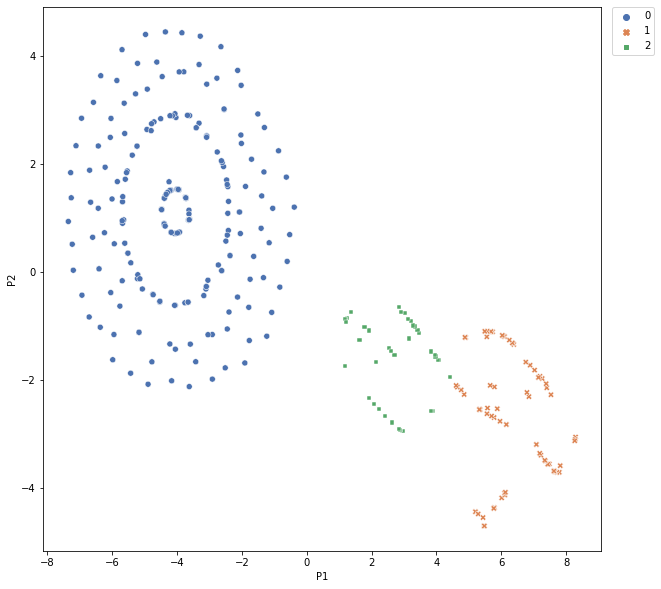

In [5]:
sector = combineSector(energy, df_sector=sector)
principle = tsneFind2Pinciple(sector)
sector_cluster= addCluster(df_sector=sector, df_principle=principle)
plot(sector_cluster)

In [6]:
checkGroupAgg(df = energy, df_sector_cluster = sector_cluster,
             by=['cluster'], func = ['max','min'])

In [7]:
checkGroupAgg(df = energy, df_sector_cluster = sector_cluster,
             by=['cluster','Sector'], func = ['max','min'])

In [8]:
groupcount(sector_cluster)

,cluster,Sector,count
35,2,Manufacturing,35
34,2,Information,5
31,2,"Agriculture, Forestry, Fishing and Hunting",4
30,2,Administrative and Support and Waste Managemen...,3
32,2,"Arts, Entertainment, and Recreation",2
37,2,"Professional, Scientific, and Technical Services",2
33,2,Health Care and Social Assistance,1
36,2,"Mining, Quarrying, and Oil and Gas Extraction",1
23,1,Manufacturing,43
24,1,"Mining, Quarrying, and Oil and Gas Extraction",5
